# **Part 1: Implement Logistic Regression**

Functions Required  -

*   Sigmoid Function
*   Function to perform forward propagation using Sigmoid function
*   Cost function
*   Function to optimize values of weight and bias
*   Function to calculate accuracy





**Sigmoid Function**

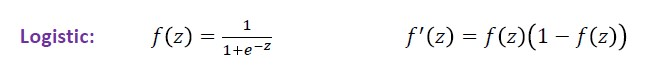

In [ ]:
def sigmoid(z):
  '''Function to calculate Sigmoid function'''
  a = 1 / (1 + np.exp(-z))      
  return a

**Function to perform forward propagation using Sigmoid function**

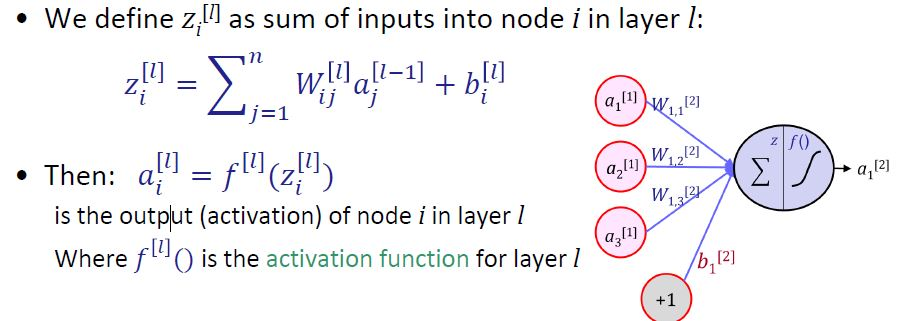

In [ ]:
def forward_prop(x, w, b):
  '''Function to perform forward propagation using Sigmoid function'''
  # Calculate z - Sum of inputs into node
  z = x.dot(w) + b
  
  # Calculate a - output (activation) of node
  # Considering Sigmoid function
  a = sigmoid(z)
  return a

**Cost function**

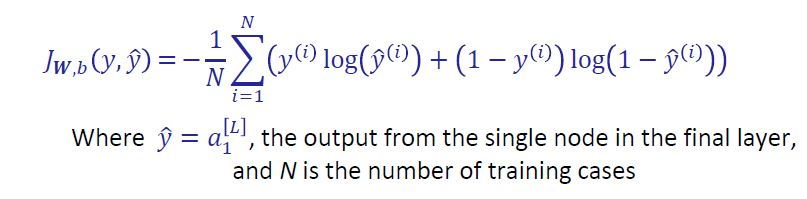

In [ ]:
def cost_function(Y_train, y_pred):
  '''Average log loss cost function'''
  # Loss function
  loss = - np.mean(Y_train * np.log(y_pred) + (1 - Y_train) * np.log(1 - y_pred))
  #loss = -(1/Y_train.shape[0])*(np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred)))
  return loss

**Function to optimize values of weight and bias**

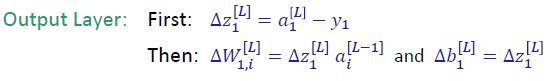

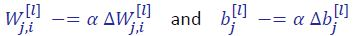

In [ ]:
def optimizer(W, b, x, Y, y_pred, lr):
  '''Gradient descent Function to optimize values of weight and bias'''
  # Δ𝑧1[𝐿]=𝑎1𝐿−𝑦1
  # Δ𝑊1,𝑖[𝐿]=Δ𝑧1[𝐿]𝑎𝑖[𝐿−1]
  dz = y_pred - Y
  dW = x.T.dot(dz)

  # Δ𝑏1[𝐿]=Δ𝑧1𝐿
  db = np.mean(dz, axis=0, keepdims=True)
  #db = dz
  
  # Update weight as 𝑊𝑗,𝑖[𝑙] −= 𝛼Δ𝑊𝑗,𝑖[𝑙]
  W -= lr * dW
  # Upate bias as 𝑏𝑗[𝑙] −= 𝛼Δ𝑏𝑗[𝑙]
  b -= lr * db
  
  return W, b

**Function to calculate accuracy**

In [ ]:
def score(Y, y_pred):
  '''Function to calculate accuracy'''
  count = 0
  y_comp = []
  for i in range(Y.shape[0]):
    # Calculate accuracy by considering output (class) of predictions with value > 0.5 is 1 or 0 if viceversa
    if y_pred[i] > 0.5:  y_comp.append(1)
    elif y_pred[i] < 0.5:  y_comp.append(0)
    else:  y_comp.append(y_pred[i])

    if (Y[i] != y_comp[i]):  count += 1
  
  accuracy = (Y.shape[0] - count)/Y.shape[0] * 100
  return accuracy

**Function to plot graph between 2 values**

In [ ]:
def plot_graph(x, y, title, xLabel, yLabel):    
  #Plot x vs y
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)
  plt.plot(x, y)
  plt.show()

 **Function to fit a neural network
approach to logistic regression model (no hidden layers) and return optimised Weights and bias**

In [ ]:
def fit(x, Y, epochs = 100, lr = 0.0005):
  '''Function to fit the inputs'''
  losses = []
  # Initialize and print random values for parameters Weight and Bias
  W = 2 * np.random.randn(x.shape[1], 1) - 1
  b = np.random.random(1)[0]
  print('------------------------------------------------------------------------------------')
  print('Initial values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  accuracy = []
  for i in range(epochs):
      # Forward propagtion - Predict class values using 
      y_pred = forward_prop(x, W, b)
      
      # Calculate loss using average log loss Cost function
      loss = cost_function(Y, y_pred)
      losses.append(loss)

      # Calculate Accuracy after each epoch
      acc= score(Y, y_pred)
      accuracy.append(acc)

      # Print loss and accuracy 
      if((i + 1) % (epochs/10) == 0):
        print('Epoch ', i+1, '/', epochs, '========', 'Loss = ', loss, 'Accuracy = ', acc)

      # Backward propagation - Optimize updated Weights and Bias using Gradient Descent
      W, b = optimizer(W, b, x, Y, y_pred, lr)

  print('------------------------------------------------------------------------------------')
  print('After ', epochs, ' iterations, final Optimized values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  #Plot epoch vs loss plot
  ax1 = plot_graph(list(range(1, epochs + 1)), losses, "Loss change with iterations", "Epochs", "Loss")

  #Plot epoch vs accuracy plot
  ax2 = plot_graph(list(range(1, epochs + 1)), accuracy, "Accuracy change with iterations", "Epochs", "Accuracy")

  del losses[:]

  return W, b

**Function to evaluate algorithm in unknown samples**

In [ ]:
def evaluate(x, Y, W, b):
  '''Function to evaluate algorithm in unknown samples''' 
  # Predict calls using optimized Weight and Bias values
  y_pred = forward_prop(x, W, b)

  # Calculate loss
  loss = cost_function(Y, y_pred)

  # Calculate Accuracy
  accuracy = score(Y, y_pred)

  print('Loss = ', loss, 'Accuracy = ', accuracy, '%')

# **Part 2: Easy Tasks**

Tasks - 


*   Divide dataset randomly into Training (70%), Validation (15%) and Test (15%) sets
*   Train a logistic regressor using your code from Part 1, and check performance on blobs250 and moons400 datasets



**Function to divide dataset randomly into Training (70%), Validation (15%) and Test (15%) sets**

In [ ]:
def train_val_test_split(features, cls):
  #Splitting data set into Train (70%), Validation (15%) and Test (15%)
  from sklearn.model_selection import train_test_split

  #Splitting dataset into 70/30 split with 70% data going into Train set and 30% into Test set
  X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size= 0.3)

  #Splitting Test data set into 50/50 split with 50% data going into Train set and 50% into Test set
  #This would give 15% for Vaidation and Test each as compared to overall dataset
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5) 

  print("X_train.shape:", X_train.shape, "X_val.shape:", X_val.shape, "X_test.shape:", X_test.shape) 
  print("y_train.shape:", y_train.shape, "y_val.shape:", y_val.shape, "y_test.shape:", y_test.shape)

  return X_train, y_train, X_val, y_val, X_test, y_test

#2.1 Data Preparation and implementation on moons400 dataset


In [ ]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from matplotlib import cm

# Display plots inline and change default figure size
%matplotlib inline

In [ ]:
# Use pandas to read the CSV file as a dataframe
moons_df = pd.read_csv("/content/moons400.csv")

# The y values are those labelled 'Class': extract their values
y_m = moons_df['Class'].values

# The x values are all other columns
del moons_df['Class']   # drop the 'Class' column from the dataframe
X_m = moons_df.values     # convert the remaining columns to a numpy array

print('X_m.shape: ', X_m.shape)
print('y_m.shape', y_m.shape)

X_m.shape:  (400, 2)
y_m.shape (400,)


In [ ]:
# Transpose the y data using 'reshape'
yt_m = np.reshape(y_m, (len(y_m),1))
print('yt_m.shape', yt_m.shape)

yt_m.shape (400, 1)


[]

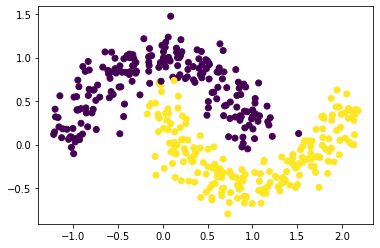

In [ ]:
# plot Features and colour points according to the class, y
for i in range(X_m.shape[1] -1):
  plt.scatter(X_m[:,i], X_m[:, i +1], c=y_m)
plt.plot()

In [ ]:
X_m_train, y_m_train, X_m_val, y_m_val, X_m_test, y_m_test = train_val_test_split(X_m, yt_m)

X_train.shape: (280, 2) X_val.shape: (60, 2) X_test.shape: (60, 2)
y_train.shape: (280, 1) y_val.shape: (60, 1) y_test.shape: (60, 1)


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[ 0.73946472]
 [-2.16309094]]
b =  0.12074997379680352
------------------------------------------------------------------------------------
Epoch  10 / 100 ======== Loss =  0.2905213596658582 Accuracy =  86.78571428571429
Epoch  20 / 100 ======== Loss =  0.28965631381046103 Accuracy =  86.78571428571429
Epoch  30 / 100 ======== Loss =  0.2892131848549181 Accuracy =  86.78571428571429
Epoch  40 / 100 ======== Loss =  0.2887973321006811 Accuracy =  86.78571428571429
Epoch  50 / 100 ======== Loss =  0.2883975989330782 Accuracy =  86.78571428571429
Epoch  60 / 100 ======== Loss =  0.28801305013031825 Accuracy =  86.78571428571429
Epoch  70 / 100 ======== Loss =  0.28764309076689926 Accuracy =  86.78571428571429
Epoch  80 / 100 ======== Loss =  0.2872871576361257 Accuracy =  86.78571428571429
Epoch  90 / 100 ======== Loss =  0.2869447090617353 Accuracy =  86.7857

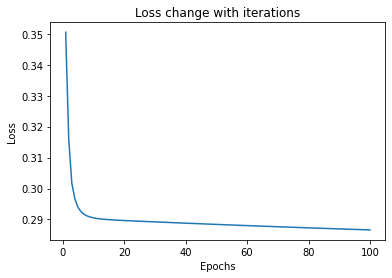

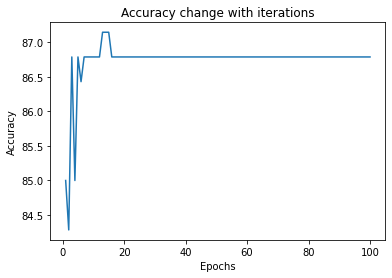

In [ ]:
#Call fit method and get optimised values of W and b
W, b = fit(X_m_train, y_m_train, epochs = 100, lr = 0.05)

In [ ]:
# Evaluate against Validation set
evaluate(X_m_val, y_m_val, W, b)

Loss =  0.26343555402528007 Accuracy =  90.0 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[-0.24358864]
 [-1.5126427 ]]
b =  0.48680659394289083
------------------------------------------------------------------------------------
Epoch  20 / 200 ======== Loss =  0.30754635879918024 Accuracy =  85.71428571428571
Epoch  40 / 200 ======== Loss =  0.2903969013662299 Accuracy =  85.35714285714285
Epoch  60 / 200 ======== Loss =  0.2853350575152219 Accuracy =  86.07142857142858
Epoch  80 / 200 ======== Loss =  0.2833820480480877 Accuracy =  85.35714285714285
Epoch  100 / 200 ======== Loss =  0.2825196916383305 Accuracy =  86.07142857142858
Epoch  120 / 200 ======== Loss =  0.28210366603226433 Accuracy =  86.07142857142858
Epoch  140 / 200 ======== Loss =  0.2818873880161818 Accuracy =  86.07142857142858
Epoch  160 / 200 ======== Loss =  0.28176571279679063 Accuracy =  86.07142857142858
Epoch  180 / 200 ======== Loss =  0.2816905825435835 Accuracy =  86

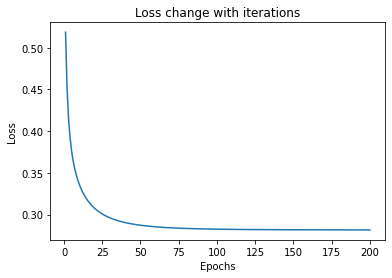

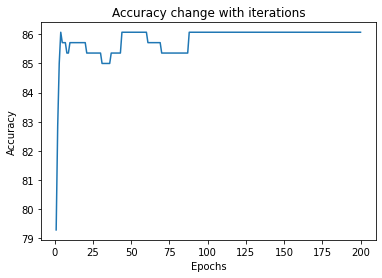

In [ ]:
# Modifying parameters (learning rate and epochs) 
# and training the model again to improve accuracy against validation dataset 
W, b = fit(X_m_train, y_m_train, epochs = 200, lr = 0.005)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
evaluate(X_m_val, y_m_val, W, b)

Loss =  0.2643824689855756 Accuracy =  90.0 %


In [ ]:
# After finding best parameter, evaluate the model on Test dataset
evaluate(X_m_test, y_m_test, W, b)

Loss =  0.2510759132043944 Accuracy =  91.66666666666666 %


# 2.2 Data Preparation and implementation on blobs250 dataset

In [ ]:
# Use pandas to read the CSV file as a dataframe
df_blobs = pd.read_csv("/content/blobs250.csv")

# The y values are those labelled 'Class': extract their values
y_b = df_blobs['Class'].values

# The x values are all other columns
del df_blobs['Class']   # drop the 'Class' column from the dataframe
X_b = df_blobs.values     # convert the remaining columns to a numpy array

print('X_b.shape: ', X_b.shape)
print('y_b.shape', y_b.shape)

X_b.shape:  (250, 3)
y_b.shape (250,)


In [ ]:
# Transpose the y data using 'reshape'
yt_b = np.reshape(y_b, (len(y_b),1))
print('yt_b.shape', yt_b.shape)

yt_b.shape (250, 1)


[]

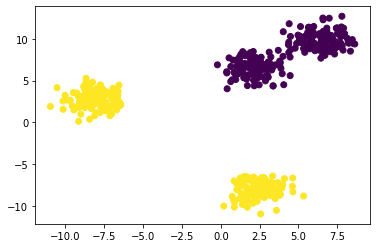

In [ ]:
# plot Features and colour points according to the class, y
for i in range(X_b.shape[1] -1):
  plt.scatter(X_b[:,i], X_b[:, i +1], c=y_b)
plt.plot()

As visible from the graph that the class data is linearly separable

In [ ]:
X_b_train, y_b_train, X_b_val, y_b_val, X_b_test, y_b_test = train_val_test_split(X_b, yt_b)

X_train.shape: (175, 3) X_val.shape: (37, 3) X_test.shape: (38, 3)
y_train.shape: (175, 1) y_val.shape: (37, 1) y_test.shape: (38, 1)


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[-3.63189724]
 [-2.97480755]
 [-1.4562248 ]]
b =  0.23183650018324142
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
After  2  iterations, final Optimized values of Weight and Bias are:
W =  [[-3.61269682]
 [-3.00771533]
 [-1.44102735]]
b =  [[0.23185873]]
------------------------------------------------------------------------------------


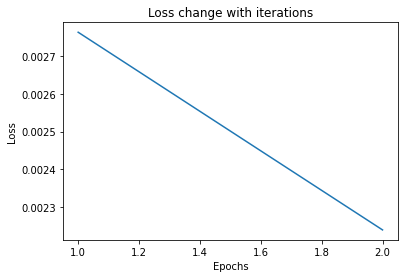

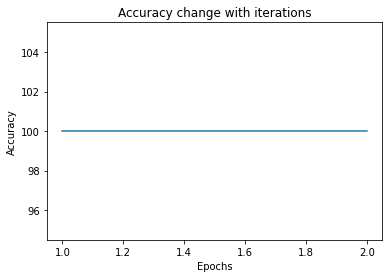

In [ ]:
#Call fit method and get optimised values of W and b
W, b = fit(X_b_train, y_b_train, epochs = 2, lr = 0.005)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
evaluate(X_b_val, y_b_val, W, b)

Loss =  0.0005827030526642514 Accuracy =  100.0 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[-1.00760503]
 [-0.47491866]
 [-3.17496026]]
b =  0.23904790866675507
------------------------------------------------------------------------------------
Epoch  1 / 5 ======== Loss =  3.846131205970722 Accuracy =  49.142857142857146
Epoch  2 / 5 ======== Loss =  nan Accuracy =  100.0
Epoch  3 / 5 ======== Loss =  nan Accuracy =  100.0
Epoch  4 / 5 ======== Loss =  nan Accuracy =  100.0
Epoch  5 / 5 ======== Loss =  nan Accuracy =  100.0
------------------------------------------------------------------------------------
After  5  iterations, final Optimized values of Weight and Bias are:
W =  [[ 0.02830184]
 [-3.99158135]
 [-1.89232048]]
b =  [[0.241552]]
------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


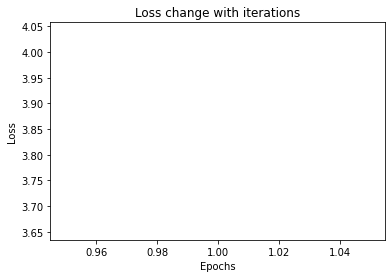

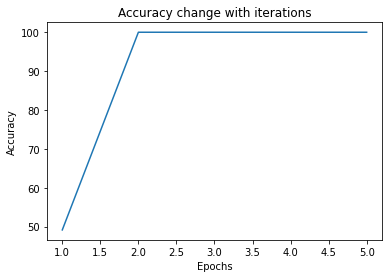

In [ ]:
# Modifying parameters (learning rate and epochs) 
# and training the model again to improve accuracy against validation dataset 
W, b = fit(X_b_train, y_b_train, epochs = 5, lr = 0.005)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
evaluate(X_b_val, y_b_val, W, b)

Loss =  4.794437821736732e-11 Accuracy =  100.0 %


In [ ]:
# As we got 100% accuracy on validation data set due to linearly separable data, evaluate the model on Test dataset
evaluate(X_b_test, y_b_test, W, b)

Loss =  7.733682996685664e-11 Accuracy =  100.0 %


# **Part 3: Implement and Test a Shallow Neural Network**

Tasks in implementing a Shallow Neural Network (support 1 Hidden Layer and 1 Output Node) -

Update on the Part 1 Logitic Regresion functions to support hidden layer(s)
*   New function (initialize_params) added to return random values of Weights and bias for all layers
*   Update Forward propagation function to accept parameters for multiple layers
*   New function to calculate derivative of sigmoid function
*   Update Optimizer function to perform Backward propagation and optimize values of Weights and Bias for all layers
*   Update fit funtion to support hidden layer(s)
*   Update evaluate function






**Function to initialize parameters (Weights and Bias) for all layers**

In [ ]:
def initialize_params(nodes):
  '''Function to return random values of W and b'''
  W = {}
  b = {}
  for i in range(1, len(nodes)):
    W['W' + str(i)] = 2 * np.random.random((nodes[i-1], nodes[i])) - 1
    b['b' + str(i)] = 2 * np.random.random((1, nodes[i])) - 1
  return W, b

**Function to perform Forward propagation for n number of Hidden layers**

In [ ]:
def updated_forward_prop(x, w, b):
  # n_h - Number of hidden layers
  n_h = len(w) - 1
  a = {}
  z = {}

  for i in range(1, len(w) + 1):
    if (i == 1):
      # z = x.w + b
      z['z' + str(i)] = x.dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = sigmoid(z['z' + str(i)])
    else:
      # z = a.w + b , where a = activation function outputs of previous layer
      z['z' + str(i)] = a['a' + str(i-1)].dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = sigmoid(z['z' + str(i)])

  return z, a

**Function to calculate derivative of Sigmoid function**

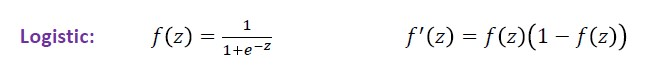

In [ ]:
def sigmoid_derivative(x):
    '''Function to calculate Sigmoid derivative'''
    # 𝑓′(𝑧) = 𝑓(𝑧)(1−𝑓(𝑧))
    return sigmoid(x)*(1 - sigmoid(x))

**Function to perform Backward propagation and optimize Weights and Biases of all layers**

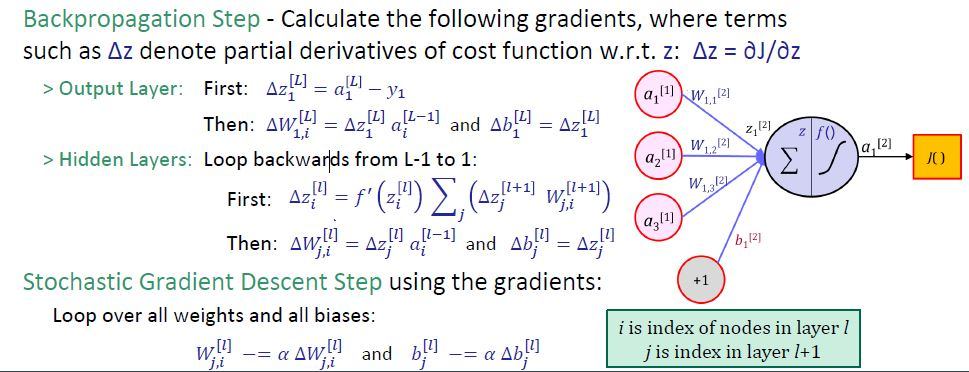

In [ ]:
def updated_optimizer(W, b, x, Y, y_pred, lr, a, z):
  '''Gradient descent Function to optimize values of weight and bias'''

  # n_l - Number of layers
  n_l = len(W)
  dW = {}
  db = {}
  dz = {}

  for i in range(n_l, 0, -1):
    if i == n_l:
      # Output Layer
      # Δ𝑧1[𝐿]=𝑎1𝐿−𝑦1
      dz['dz' + str(i)] = y_pred - Y
    else:
      # Hidden Layers
      dz['dz' + str(i)] = np.multiply(sigmoid_derivative(z['z' + str(i)]), np.dot(dz['dz' + str(i+1)], W['W' + str(i + 1)].T))
      
    if i==1:
      dW['dW' + str(i)] = x.T.dot(dz['dz' + str(i)])
    else:
      dW['dW' + str(i)] = a['a' + str(i - 1)].T.dot(dz['dz' + str(i)])


    db['db' + str(i)] = np.mean(dz['dz' + str(i)], axis=0, keepdims=True)

  # Updating Weights and bias
  for i in range(1, n_l +1):
    # Update weight as 𝑊𝑗,𝑖[𝑙] −= 𝛼Δ𝑊𝑗,𝑖[𝑙]
    W['W' + str(i)] -= lr * dW['dW' + str(i)]

    # Upate bias as 𝑏𝑗[𝑙] −= 𝛼Δ𝑏𝑗[𝑙]
    b['b' + str(i)] -= lr * db['db' + str(i)]
  

  return W, b

**Function to fit a Shallow Neural Network Logistic Regression Model with 1 hidden layer and 1 output node**

In [ ]:
def updated_fit(x, Y, nodes, epochs = 100, lr = 0.0005):
  '''Function to fit the inputs'''
  losses = []
  # Initialize and print random values for parameters Weight and Bias
  W, b = initialize_params(nodes)
  print('------------------------------------------------------------------------------------')
  print('Initial values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  accuracy = []
  for i in range(epochs):
      # Forward propagtion - Predict class values using 
      z, a = updated_forward_prop(x, W, b)
      
      # Calculate loss using average log loss Cost function
      loss = cost_function(Y, a['a' + str(len(W))])
      losses.append(loss)

      # Calculate Accuracy after each epoch
      acc= score(Y, a['a' + str(len(W))])
      accuracy.append(acc)

      # Print loss and accuracy 
      if((i + 1) % (epochs/10) == 0):
        print('Epoch ', i+1, '/', epochs, '========', 'Loss = ', loss, 'Accuracy = ', acc)

      # Backward propagation - Optimize updated Weights and Bias using Gradient Descent
      W, b = updated_optimizer(W, b, x, Y, a['a' + str(len(W))], lr, a, z)

  print('------------------------------------------------------------------------------------')
  print('After ', epochs, ' iterations, final Optimized values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  #Plot epoch vs loss plot
  ax1 = plot_graph(list(range(1, epochs + 1)), losses, "Loss change with iterations", "Epochs", "Loss")

  #Plot epoch vs accuracy plot
  ax2 = plot_graph(list(range(1, epochs + 1)), accuracy, "Accuracy change with iterations", "Epochs", "Accuracy")

  del losses[:]

  return W, b

**Function to evaluate the algorithm**

In [ ]:
def updated_evaluate(x, Y, W, b):
  '''Function to evaluate algorithm in unknown samples''' 
  # Predict calls using optimized Weight and Bias values
  z, a = updated_forward_prop(x, W, b)

  # Calculate loss
  loss = cost_function(Y, a['a' + str(len(W))])

  # Calculate Accuracy
  accuracy = score(Y, a['a' + str(len(W))])

  print('Loss = ', loss, 'Accuracy = ', accuracy, '%')

**Testing implementation on the two small datasets**

**Testing on moons400 dataset**

In [ ]:
# Number of Hidden layers = 1
# Nodes format - [no. of input nodes, no. of hidden layer nodes (if multiple hls, separate by commas), output node]
nodes = [X_m_train.shape[1], 5, 1]

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[ 0.57474096,  0.72214824, -0.27526929,  0.48832423, -0.69277411],
       [ 0.47051134, -0.03438793, -0.81563636,  0.98010256,  0.29135547]]), 'W2': array([[-0.45177842],
       [-0.5080267 ],
       [-0.40952713],
       [ 0.45314552],
       [ 0.11719355]])}
b =  {'b1': array([[-0.38964371,  0.35862444, -0.90996642,  0.31864783,  0.2806912 ]]), 'b2': array([[-0.84946756]])}
------------------------------------------------------------------------------------
Epoch  10 / 100 ======== Loss =  0.33894593083115865 Accuracy =  85.0
Epoch  20 / 100 ======== Loss =  0.32642966733200973 Accuracy =  84.64285714285714
Epoch  30 / 100 ======== Loss =  0.3163400950550764 Accuracy =  85.71428571428571
Epoch  40 / 100 ======== Loss =  0.3019977073089302 Accuracy =  86.07142857142858
Epoch  50 / 100 ======== Loss =  0.2851086428219327 Accuracy =  88.214285714

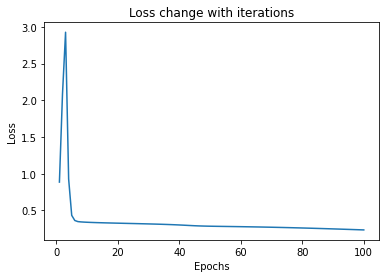

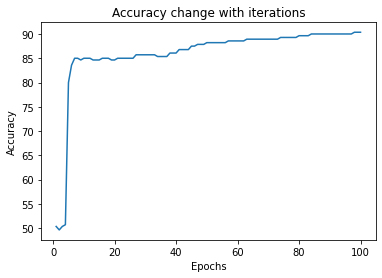

In [ ]:
# Fit the training samples for moons400 dataset into updated Logistic Regression model with 1 hidden layer
W, b = updated_fit(X_m_train, y_m_train, nodes, epochs = 100, lr = 0.05)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
updated_evaluate(X_m_val, y_m_val, W, b)

Loss =  0.22875873904649027 Accuracy =  88.33333333333333 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[-0.1018415 ,  0.03835587,  0.22509849, -0.95067887,  0.48610137,
         0.54188212, -0.08915758,  0.0735063 ,  0.76116201,  0.73959987],
       [-0.1372979 ,  0.67912919,  0.13871693,  0.57395499,  0.11886558,
         0.33792067,  0.6606031 , -0.09977101,  0.47307321, -0.98721366]]), 'W2': array([[-0.55267578],
       [-0.3869473 ],
       [-0.84543024],
       [ 0.22265193],
       [-0.50492282],
       [-0.50780229],
       [-0.94576703],
       [-0.37246559],
       [ 0.30061211],
       [-0.38324844]])}
b =  {'b1': array([[ 0.3389619 , -0.70757958,  0.9261552 , -0.44917704,  0.41255936,
         0.85728967, -0.93714036,  0.05275923,  0.4313832 , -0.4909056 ]]), 'b2': array([[0.66545754]])}
------------------------------------------------------------------------------------
Epoch  20 / 200 ======== Loss =  0.26348886072505096 Accuracy =  

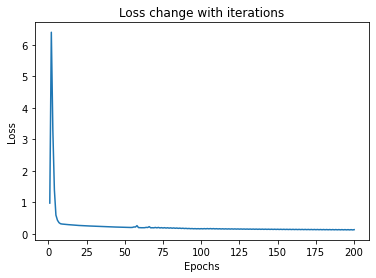

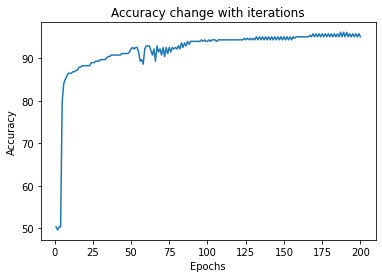

In [ ]:
# Adding more nodoes to Hidden layer and updating parameters so as to increase accuracy of Valiation set
nodes = [X_m_train.shape[1], 10, 1]
W, b = updated_fit(X_m_train, y_m_train, nodes, epochs = 200, lr = 0.05)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
updated_evaluate(X_m_val, y_m_val, W, b)

Loss =  0.14266578224775162 Accuracy =  93.33333333333333 %


In [ ]:
# Accuracy of the model on test dataset
updated_evaluate(X_m_test, y_m_test, W, b)

Loss =  0.10107310590057332 Accuracy =  95.0 %


As we can see, the accuracy of model with 1 hidden layer for the moons400 data set is higher than the implementation of Logistic Regression with no hidden layers in part 1




-----



**Testing on blobs250 dataset**

In [ ]:
# Number of Hidden layers = 1
# Nodes format - [(no. of input nodes), (no. of hidden layer nodes), (output node)]
nodes = [X_b_train.shape[1], 5, 1]

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[ 0.32804902,  0.53878684,  0.99691698,  0.61426657, -0.20951463],
       [ 0.47634734, -0.29504992, -0.28447426, -0.44055966, -0.55811689],
       [-0.52944304,  0.53040036, -0.92169733, -0.33200979, -0.53968593]]), 'W2': array([[ 0.88961595],
       [ 0.44155668],
       [ 0.81052707],
       [ 0.01843306],
       [-0.79146011]])}
b =  {'b1': array([[-0.87778864, -0.93337067,  0.14346694, -0.5260235 , -0.75059218]]), 'b2': array([[-0.0094246]])}
------------------------------------------------------------------------------------
Epoch  1 / 10 ======== Loss =  0.7261603354138876 Accuracy =  51.42857142857142
Epoch  2 / 10 ======== Loss =  0.3384941145047661 Accuracy =  100.0
Epoch  3 / 10 ======== Loss =  0.23283061863369212 Accuracy =  100.0
Epoch  4 / 10 ======== Loss =  0.09440526074893914 Accuracy =  100.0
Epoch  5 / 10 ======== Loss =  0.0

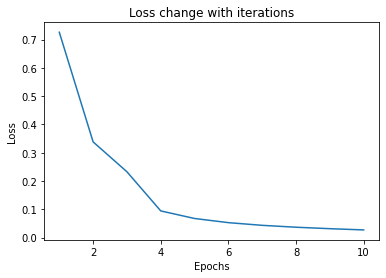

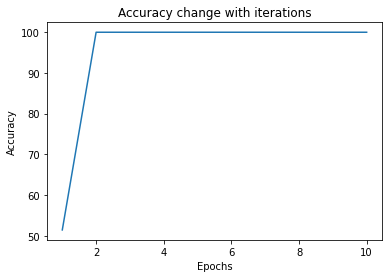

In [ ]:
# Fit the training samples for blobs250 dataset into updated Logistic Regression model with 1 hidden layer
W, b = updated_fit(X_b_train, y_b_train, nodes, epochs = 10, lr = 0.05)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
updated_evaluate(X_b_val, y_b_val, W, b)

Loss =  0.022684716047755668 Accuracy =  100.0 %


In [ ]:
# No need to update the parameters as accuracy on Validation dataset is 100%
updated_evaluate(X_b_test, y_b_test, W, b)

Loss =  0.02609404553601207 Accuracy =  100.0 %


The accuracy remained 100% for the linearly separable blobs250 dataset with the addition of 1 hiddel layer to the neural network

------------

# **Part 4: Challenging Task**

Tasks -

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
def loadbatch(batchname):
    folder = '/content'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [ ]:
def loadlabelnames():
    folder = '/content'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [ ]:
import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [ ]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


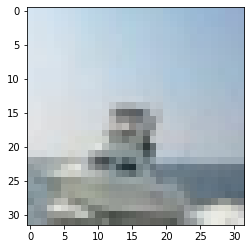

Image 100 : Class is  b'ship'


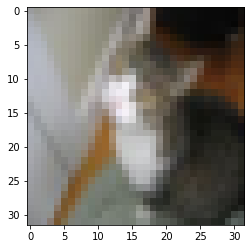

Image 101 : Class is  b'cat'


In [ ]:
# Display a few images from the batch
for i in range (100,102):
   visualise(data, i)
   print("Image", i,": Class is ", names[labels[i]])

In [ ]:
def convert_rgb_to_grayscale(rgb_picture):
  # Function to convert RGB colour channels to Gray scale
  # Y'= 0.299R'+0.587G'+ 0.114B' (https://en.wikipedia.org/wiki/Grayscale)
  return np.dot(rgb_picture[...,:3], [0.299, 0.587, 0.114])

In [ ]:
def data_preprocessing(data, classes):

  # Get label values for names matching classes
  label_values = []
  for i in range(len(names)):
    if names[i] in classes:
      label_values.append(i)
  
  # Get indexes from label where values match label values calculated above
  class_idx = [idx for idx, element in enumerate(labels) if element in label_values]

  features = []
  lbls = []

  for i in class_idx:
    picture = data[i]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    picture.shape = (3,32,32)
    picture = picture.transpose([1, 2, 0])

    # Converting to Gray scale
    gray = convert_rgb_to_grayscale(picture)

    # Convert to vector of 1024 floats
    gray.shape = 1024

    features.append(gray)

    lbls.append(labels[i])

    

  return features, lbls

In [ ]:
# 2 classes to distinguish between are Frog and Airplane
classes = [b'frog', b'airplane']
features, lbls = data_preprocessing(data, classes)
X = np.array(features)
y = np.array(lbls)
print('X.shape: ', X.shape)
print('y.shape', y.shape)

X.shape:  (2035, 1024)
y.shape (2035,)


In [ ]:
# Transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))
print('yt.shape', yt.shape)

# Convert yt to a 0 or 1 array
label_values = []
for i in range(len(names)):
  if names[i] in classes:
    label_values.append(i)

for i in range(len(yt)):
  if yt[i] == label_values[0]:  yt[i] = [0]
  else:  yt[i] = [1]


yt.shape (2035, 1)


Data Normalization

In [ ]:
# Converting values between 0 and 1
X = X.astype('float32') / 255

In [ ]:
# Plot Features and colour points according to the class, y
"""
for i in range(X.shape[1] -1):
  plt.scatter(X[:,i], X[:, i +1], c=y)
plt.plot()
"""

'\nfor i in range(X.shape[1] -1):\n  plt.scatter(X[:,i], X[:, i +1], c=y)\nplt.plot()\n'

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, yt)

X_train.shape: (1424, 1024) X_val.shape: (305, 1024) X_test.shape: (306, 1024)
y_train.shape: (1424, 1) y_val.shape: (305, 1) y_test.shape: (306, 1)


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[-0.67065573, -0.51641446, -0.39232749, ...,  0.57839158,
        -0.32256956, -0.11912945],
       [-0.15834865,  0.63764896,  0.09803954, ...,  0.95575334,
        -0.02242253, -0.85791941],
       [-0.39726829,  0.11230765, -0.47022475, ...,  0.40056982,
        -0.4848372 ,  0.26333014],
       ...,
       [-0.97926982, -0.88430727, -0.98340903, ..., -0.59454556,
        -0.59251403,  0.73693828],
       [ 0.20295548,  0.50515098,  0.94517901, ...,  0.59954759,
         0.30941978,  0.96074226],
       [-0.83497763, -0.45504188,  0.30444743, ...,  0.94787069,
         0.13435663,  0.53417262]]), 'W2': array([[-0.73373891],
       [ 0.41310851],
       [-0.91922629],
       [-0.81144122],
       [ 0.59738859],
       [-0.24082251],
       [ 0.55437627],
       [ 0.20609728],
       [ 0.22149259],
       [ 0.39416845]])}
b =  {'b1': array([[-0

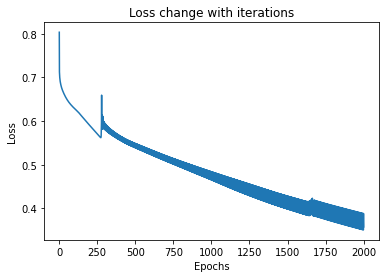

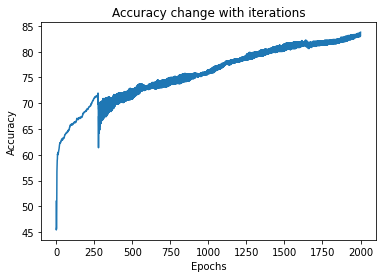

In [ ]:
#Call fit method and get optimised values of W and b
nodes = [X_train.shape[1], 10, 1]
W, b = updated_fit(X_train, y_train, nodes, epochs = 2000, lr = 0.0005)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
updated_evaluate(X_val, y_val, W, b)

Loss =  0.5798469625474816 Accuracy =  73.11475409836066 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[-0.1944427 ,  0.56889417, -0.56008745, ..., -0.29149883,
        -0.8568235 , -0.06007409],
       [-0.18845127, -0.29420739, -0.19252797, ...,  0.623935  ,
         0.61432043, -0.67616861],
       [-0.18614678, -0.54880248, -0.67911998, ..., -0.44494971,
         0.25612513, -0.46004363],
       ...,
       [ 0.98727336,  0.86828915,  0.44725412, ..., -0.52274527,
         0.4915276 ,  0.72254384],
       [-0.97077136,  0.93961388, -0.34378831, ..., -0.5453367 ,
         0.27054988,  0.13728563],
       [ 0.08363241, -0.93648235, -0.0807976 , ..., -0.53173166,
         0.51481008,  0.34091312]]), 'W2': array([[ 0.27057563],
       [-0.04160158],
       [ 0.94067589],
       [ 0.50720715],
       [ 0.56714302],
       [ 0.6244087 ],
       [-0.69018098],
       [-0.80128228],
       [-0.21244503],
       [ 0.64800096],
       [-0.9509952 ],
  

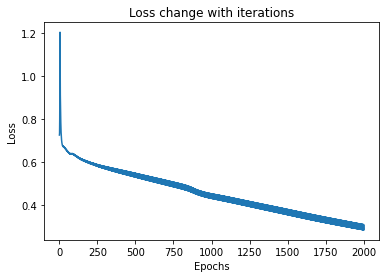

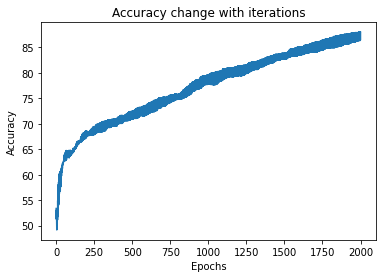

In [ ]:
#Call fit method and get optimised values of W and b
nodes = [X_train.shape[1], 20, 1]
W, b = updated_fit(X_train, y_train, nodes, epochs = 2000, lr = 0.0005)

In [ ]:
# Accuracy of the model on validation dataset after updates to parameters
updated_evaluate(X_val, y_val, W, b)

Loss =  0.6140663935757681 Accuracy =  76.0655737704918 %


In [ ]:
updated_evaluate(X_test, y_test, W, b)

Loss =  0.6419361443313024 Accuracy =  68.62745098039215 %
